# Data Collection: DEA Database

In [1]:
from urllib2 import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# IMDB library to crawl data from imdb
from imdb import IMDb

# create plots inline
%matplotlib inline

In [2]:
"""
IMDB Variables with global scope
"""
ia = IMDb()

#Initialise the array for all interested tv shows
tv_series_drugs = ['0903747', '1124035', '0117951', '0765429', '0099685', '0180093',  '0910936','0439100' ]

tv_series_whitehouse = ['1856010', '1837576','0200276', '1124035', '1024648', '2334879', '2302755', '1327773']

# Array for storing ids and names of respective series
tv_series_names = {}


# get data for shows
def getData(tv_series):

    # Array for storing the votes count of respective series
    tv_series_votes = {}

    # Array for storing the ratings count of respective series
    tv_series_ratings = {}

    for series in tv_series:

        tv_series_name = ia.get_movie(series)
        tv_series_names[series] = tv_series_name
        print "Processing data for ", tv_series_name

        # print tv_series_name.keys()

        # case for movies
        if tv_series_name['kind'] == 'movie':
            # Intialisation
            title = tv_series_name['title']
            tv_series_votes[title] = {}
            tv_series_ratings[title] = {}

            tv_series_votes[title][tv_series_name['year']] = tv_series_name['votes']
            tv_series_ratings[title][tv_series_name['year']] = tv_series_name['rating']
            continue
        else:
            ia.update(tv_series_name, 'episodes')
            episodes = tv_series_name['episodes']

            ia.update(tv_series_name, 'episodes rating')
            start = 0
            ratings = {}
            tv_series_votes[tv_series_names[series]['title']] = {}
            tv_series_ratings[tv_series_names[series]['title']] = {}
            for season_num in episodes:
                num_episodes_season = len(episodes[season_num])

                #print tv_series_name['episodes rating']
                season_episodes = tv_series_name['episodes rating'][start: start + num_episodes_season]

                votes = 0
                ratings = 0

                tiles_per_season = episodes[season_num]

                for item in season_episodes:
                    votes += item['votes']
                    ratings += item['rating']

                year = tiles_per_season[1]['year']
                tv_series_votes[tv_series_names[series]['title']][int(year)] = votes
                tv_series_ratings[tv_series_names[series]['title']][int(year)] = ratings / num_episodes_season
                start += len(episodes[season_num])

    return tv_series_votes, tv_series_ratings


# Takes dataframe as an input and creates a Bar plot
def drawBarPlot(df):
    ax = df.plot.bar()
    for p in ax.patches:
        if int(p.get_height()) != 0:
            #ax.annotate(int(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

            ax.annotate(int(p.get_height()),
                        (p.get_x()+p.get_width()/2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.show()

In [3]:
"""
Get data about domestic drug seizures
Source: DEA website
"""
url = 'http://www.dea.gov/resource-center/statistics.shtml'
soup = BeautifulSoup(urlopen(url).read(), 'lxml')

table = soup.find(lambda tag: tag.name=='table' and tag.has_attr('width') and tag['width']=="75%")
rows = table.findAll(lambda tag: tag.name=='tr')
t = [] # initialize a table, which is a list of lists
for row in rows[1:-3]:
	r = []
	for val in row.find_all(lambda tag: tag.name=='td'):
		text = val.text
		r.append(text.replace("*", "").replace(",", ""))
	t.append(r)
for elem in t:
	print elem

[u'Calendar Year\xa0', u'Cocaine    (kgs)\xa0', u'Heroin    (kgs)\xa0', u'Marijuana    (kgs)\xa0', u'Methamphetamine    (kgs)\xa0', u'Hallucinogens    (dosage units)\xa0']
[u'2014', u'33770', u'1020', u'74225', u'2946', u'48970']
[u'2013', u'24103', u'1044', u'270823', u'4227', u'119507']
[u'2012', u'36736', u'1010', u'388064', u'4813', u'872366']
[u'2011', u'32151', u'1077', u'575972', u'2561', u'3978404']
[u'2010', u'30061', u'713', u'725862', u'2224', u'2605997']
[u'2009', u'50705', u'622', u'671650', u'2129', u'3427346']
[u'2008', u'50461', u'605', u'662137', u'1518', u'9311715']
[u'2007', u'98065', u'623', u'360708', u'1112', u'5677739']
[u'2006', u'71604', u'816', u'328275', u'1804', u'3745560']
[u'2005', u'118128', u'622', u'283382', u'2161', u'8868465']
[u'2004', u'117844', u'669', u'266088', u'1656', u'2196988']
[u'2003', u'73720', u'788', u'254242', u'1680', u'3038916']
[u'2002', u'63513', u'709', u'238646', u'1347', u'11824798']
[u'2001', u'59415', u'747', u'272120', u'1634'

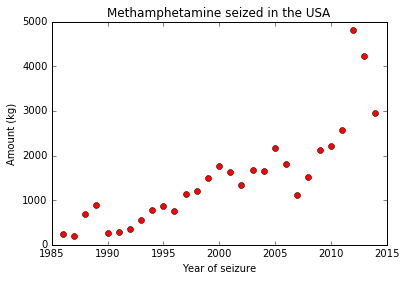

In [4]:
# Plotting data for methamphetamine
years = [r[0] for r in t[1:]]
meth = [r[4] for r in t[1:]] 

# Write the data in a seperate file; To create cumulatove graph
# f=open("meth_data.csv",'w')
# f.write("Year" + ","+ "Amount_of_Meth" + "\n")
# for i,j in zip(years,meth):
#     #print i.encode('utf-8')
#     #print i.encode('utf-8')
#     f.write(i.encode('utf-8') + ","+ j.encode('utf-8') + "\n")
# f.close()

plt.plot(years, meth, "ro")
plt.xlabel("Year of seizure")
plt.ylabel("Amount (kg)")
plt.title("Methamphetamine seized in the USA")
plt.show()

In [5]:
"""
Get data about meth lab incidents
Source: LibreOffice Calc (.ods) file
"""

from pyexcel_ods import get_data

data = get_data("meth_lab_incidents.ods")
for row in data:
	print row

[u'Year', u'Total']
[2014.0, 9338.0]
[2013.0, 12050.0]
[2012.0, 13441.0]
[2011.0, 13423.0]
[2010.0, 15220.0]
[2009.0, 12851.0]
[2008.0, 8810.0]
[2007.0, 6858.0]
[2006.0, 9177.0]
[2005.0, 17619.0]
[2004.0, 23829.0]


Processing Shows for Drugs
Processing data for  Breaking Bad
Processing data for  The Ides of March
Processing data for  Trainspotting
Processing data for  American Gangster
Processing data for  Goodfellas
Processing data for  Requiem for a Dream
Processing data for  Pineapple Express
Processing data for  Weeds
      American Gangster  Breaking Bad  Goodfellas  Pineapple Express  \
1990                  0             0      724432                  0   
1996                  0             0           0                  0   
2000                  0             0           0                  0   
2005                  0             0           0                  0   
2006                  0             0           0                  0   
2007             323698             0           0                  0   
2008                  0         63873           0             254084   
2009                  0         96365           0                  0   
2010                  0        100613  

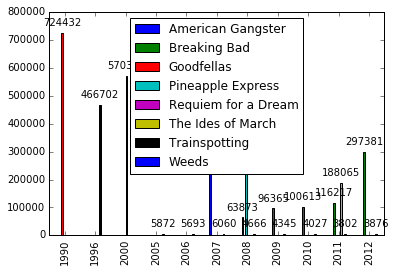

In [6]:
# Get IMDB data for Drug related shows and movies and draw a cumulative plot
print "Processing Shows for Drugs"
tv_series_votes, tv_series_ratings = getData(tv_series_drugs)
df = pd.DataFrame.from_dict(tv_series_votes)
df.fillna(0, inplace=True)
print df
df.to_csv('drugs_imdb.csv')

drawBarPlot(df)

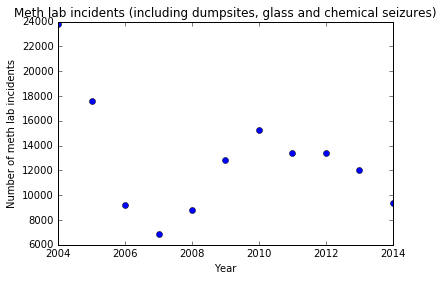

In [7]:
# Plotting data for meth lab incidents
incid_years = [d[0] for d in data[1:]]
incidents = [d[1] for d in data[1:]]
plt.plot(incid_years, incidents, "bo")
plt.xlabel("Year")
plt.ylabel("Number of meth lab incidents")
plt.title("Meth lab incidents (including dumpsites, glass and chemical seizures)")
plt.show()

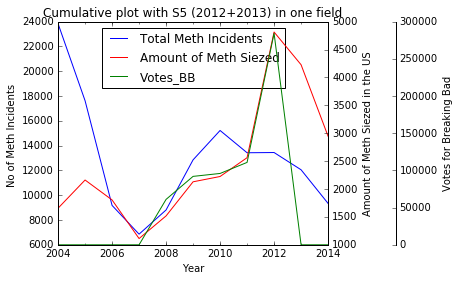

Correlation of Total/Amount of Meth with TV Shows and Movies data
                 Total    Amount  Votes_BB  Votes_Shows  Votes_Movies  \
Total         1.000000  0.033079  0.033006     0.269643     -0.676616   
Amount        0.033079  1.000000  0.566097     0.920596     -0.492400   
Votes_BB      0.033006  0.566097  1.000000     0.999982     -0.278997   
Votes_Shows   0.269643  0.920596  0.999982     1.000000     -0.279019   
Votes_Movies -0.676616 -0.492400 -0.278997    -0.279019      1.000000   
Total_Votes  -0.459600  0.155675  0.411894     0.411885      0.760123   

              Total_Votes  
Total           -0.459600  
Amount           0.155675  
Votes_BB         0.411894  
Votes_Shows      0.411885  
Votes_Movies     0.760123  
Total_Votes      1.000000  


In [8]:
"""
This code is to create the cumulative graphs of Meth lab incidents, amount of Meth siezed
Breaking bad shows

We've used files meth_lab_incidents_processed.csv to save te data crawled in above steps so
that our work is parallel and we don't need to wait for inputs from each other

"""

df1 = pd.DataFrame.from_csv("meth_lab_incidents_processed.csv")
df1.fillna(0, inplace=True)

df2 = pd.DataFrame.from_csv("drugs_imdb_processed.csv")

fig, ax = plt.subplots()
ax2, ax3 = ax.twinx(), ax.twinx()

rspine = ax3.spines['right']
rspine.set_position(('axes', 1.25))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.75)


df1.Total.plot(ax=ax, style='b-', label='Total Meth Incidents')
df1.Amount.plot(ax=ax2, style='r-', label='Amount of Meth Siezed')
df1.Votes_BB.plot(ax=ax3, style='g-', label="Votes_BB")
ax.set_ylabel('No of Meth Incidents ')
ax2.set_ylabel('Amount of Meth Siezed in the US')
ax3.set_ylabel('Votes for Breaking Bad')
#plt.legend()

lines = ax.get_lines() + ax2.get_lines() + ax3.get_lines()
ax.legend(lines, [line.get_label() for line in lines], loc='upper center')

plt.title('Cumulative plot with S5 (2012+2013) in one field')
plt.show()


print "Correlation of Total/Amount of Meth with TV Shows and Movies data";
result = df1.join(df2)

y = result.corr()
print y

In [ ]:
"""
Retrieves the total number of visits per year from the whitehouse logs.
Download the log at https://open.whitehouse.gov/api/views/p86s-ychb/rows.csv?accessType=DOWNLOAD (1GB).
Edit the following file variable to match the location of the log file.
"""


#Please avoid running the code below. It just reads the data from remote file and plot a graph 
# of number of appointments year wise  

# save a local version of file. for less data; using remote for final submission

file = "https://open.whitehouse.gov/api/views/p86s-ychb/rows.csv?accessType=DOWNLOAD" #Data file


fields = ['APPT_START_DATE'] #Fields to extract from the CSV file
df = pd.read_csv(file, usecols=fields, parse_dates=True, infer_datetime_format=True) #Read the file

"""
The read_csv method can't process all the dates as some are ill-formated (expected: mm/dd/yyyy hh:mm but we can 
find mm/dd/yy and no time).
Turn the extracted date values to date objects in the dataframe as a second pass to fix conversion errors.
"""
df['APPT_START_DATE'] = pd.to_datetime(df['APPT_START_DATE'], errors='coerce')
df['Year'] = pd.DatetimeIndex(df['APPT_STARTx_DATE']).year  #Create a column that just contains the years.


result = pd.Series(df.groupby('Year').size()) #group by year and return the number of occurrences per year
result.index = result.index.astype(int) #years are float right now, so turn to int
result.index = result.index.astype(str) #turn years to str for pretty printing in the graph (cannot do float->str)
plt.ylabel('Number of appointments')
plt.title('Whitehouse Visitors')
result.plot()

In [ ]:
#Data from IMDB for Whitehouse related shows
print "Processing Shows for White house"

tv_series_votes1, tv_series_ratings1 = getData(tv_series_whitehouse)
df = pd.DataFrame.from_dict(tv_series_votes1)
df.fillna(0, inplace=True)
print df
df.to_csv('whitehouse_imdb.csv')

drawBarPlot(df)

In [ ]:
# Cumulative graph for political related shows and Number of appointments
df1 = pd.DataFrame.from_csv("data.csv")
df2 = pd.DataFrame.from_csv("whitehouse_imdb_processed.csv")

result = df1.join(df2)
result.fillna(0, inplace=True)
fig, ax = plt.subplots()
ax2 = ax.twinx()
fig.subplots_adjust(right=0.75)

result.Number_of_Visitors.plot(ax=ax, style='b-', label='Total Number of Appointments')
result.Total_Votes.plot(ax=ax2, style='r-', label='Number of votes for all movies+Tv shows')
ax.set_ylabel('Total number of Appointments')
ax2.set_ylabel('Number of votes for all movies+Tv shows')


lines = ax.get_lines() + ax2.get_lines()

ax.legend(lines, [line.get_label() for line in lines], loc='lower center')

plt.title('Cumulative plot Num of Appointment vs all movies+TV shows votes (political theme)')
plt.show()


print "Correlation of Number of Appointments vs all movies+TV shows votes";

y = result.corr()
print y